<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Insect_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy==1.22.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
rembg 2.0.35 requires numpy>=1.23.5, but you have numpy 1.22.0 which is incompatible.


In [87]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [91]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

fatal: destination path 'Prediction-Recommedation-system-for-Potato-Cultivation' already exists and is not an empty directory.


In [92]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [93]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/Training/'+cls
    for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        
        #Resize
        resizedImage = cv2.resize(realimage, (400,400))
        #contrast improve
        color_contrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogram_image=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        clahe_image=cv2.merge((op2_R,op2_G,op2_B))
        #outputImages=[smooth_image, histogram_image,clahe_image]
        #titles=['Original Image','Adjust histogram','clahe Image']
        #for i in range(3):
         #   plt.subplot(1,3,i+1)
          #  plt.imshow(outputImages[i])
           # plt.title(titles[i])
            #plt.xticks([])
            #plt.yticks([])
        #plt.show()
       
        x.append(clahe_image)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/Preprocessed/'+str(img_no)+'.jpg',clahe_image)   
        #img_no+=1
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

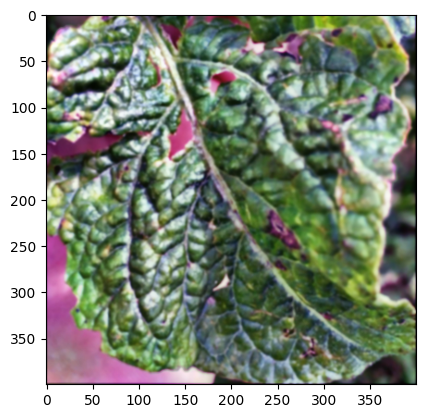

In [ ]:
plt.imshow(x[150])

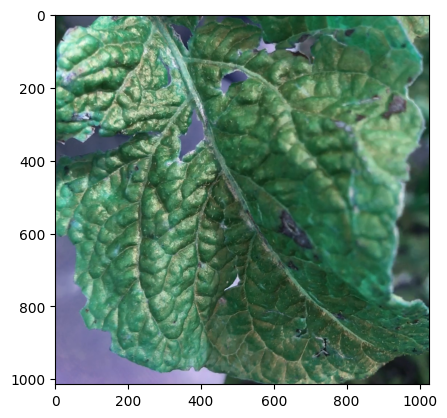

In [ ]:
plt.imshow(z[150])

(array([   0.,   10.,   10.,   43.,   56.,   89.,  104.,  122.,  148.,
         161.,  229.,  307.,  419.,  478.,  598.,  712.,  793., 1003.,
         946., 1252., 1278., 1286., 1499., 1445., 1473., 1471., 1626.,
        1547., 1649., 1582., 1578., 1692., 1625., 1737., 1634., 1639.,
        1711., 1845., 1757., 1770., 1905., 1716., 1829., 2060., 1759.,
        1833., 1784., 1696., 1928., 1639., 1782., 1606., 1825., 1751.,
        1605., 1698., 1609., 1613., 1589., 1522., 1468., 1489., 1502.,
        1496., 1493., 1500., 1524., 1404., 1529., 1489., 1520., 1551.,
        1537., 1478., 1521., 1499., 1522., 1502., 1558., 1532., 1593.,
        1568., 1465., 1582., 1564., 1611., 1603., 1651., 1660., 1583.,
        1636., 1693., 1719., 1813., 1786., 1769., 1737., 1709., 1833.,
        1822., 1890., 1817., 1859., 1826., 1882., 2007., 1931., 1931.,
        1913., 1984., 1947., 1948., 2041., 1962., 1941., 1947., 1955.,
        2031., 2104., 2095., 2092., 2073., 2172., 2116., 2077., 2241.,
      

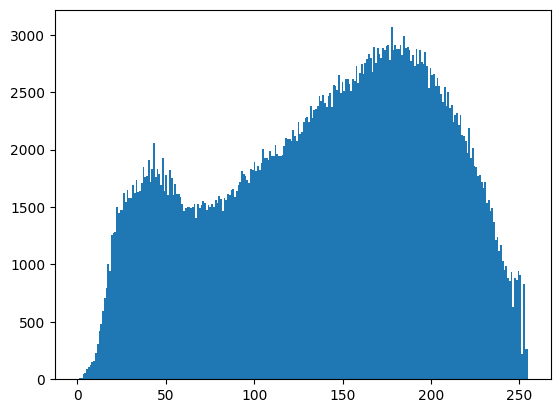

In [ ]:
plt.hist(x[100].flat, bins=256, range=(0,255))

In [ ]:
x=[]
pth = '/content/drive/MyDrive/Insect/Preprocessed'
for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        img1 = cv2.resize(realimage, (400,400))
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/bgremove/'+str(img_no)+'.jpg',bg_rem_img)   
        #img_no+=1

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 102GB/s]


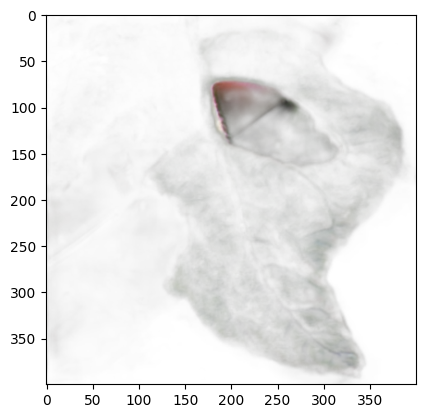

In [ ]:
plt.imshow(x[150])

In [94]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/bgremove/')
classes = {'colo':0, 'flea':1}

In [95]:
x=[]
y=[]
z=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1) 

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)
        
        x.append(result)
        y.append(classes[cls])
        z.append(img)

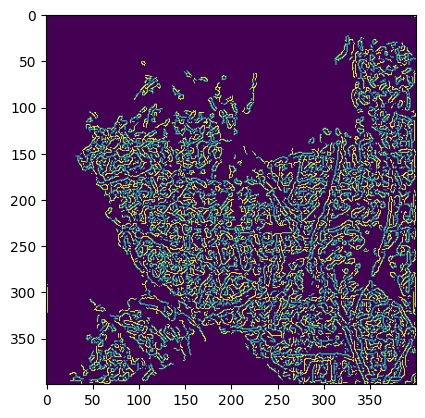

In [ ]:
plt.imshow(x[15])

In [96]:
np.unique(y)

array([0, 1])

In [97]:
x=np.array(x)
y=np.array(y)

In [98]:
pd.Series(y). value_counts()

0    210
1    190
dtype: int64

In [99]:
#Prepare data
x_updated = x.reshape(len(x), -1)
x_updated.shape

(400, 160000)

In [100]:
# Split dataset into random train and test subsets:
xtrain, xtest,ytrain,ytest = train_test_split(x_updated, y, random_state=10,test_size=20)

In [101]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [102]:
#Feature Scalling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [103]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [104]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)

In [105]:
#feature extraction and dimensionality reduction
from sklearn.decomposition import PCA

In [106]:
#Feature Selection : PCA
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(380, 160000) (20, 160000)


In [107]:
print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

(380, 160000) (20, 160000)


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
lg=LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
#import warnings
#warnings.filterwarnings('ignore')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
print("Training Score:",lg.score(pca_train,ytrain))
print("Testing Score:",lg.score(pca_test,ytest))

Training Score: 0.9763157894736842
Testing Score: 0.95


In [110]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [111]:
print("Training Score:",sv.score(pca_train,ytrain))
print("Testing Score:",sv.score(pca_test,ytest))

Training Score: 0.9394736842105263
Testing Score: 0.9


In [112]:
import joblib

# Save the trained model to Google Drive
joblib.dump(sv, '/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')


['/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl']

In [113]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([3, 5]),)

In [114]:
pred[18]

0

In [115]:
ytest[15]

1

[0 1]
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants and destroy them to prevent the spread of the disease.
Solutions for Colorado Potato Beetles:
1. Remove any infected potato plants a

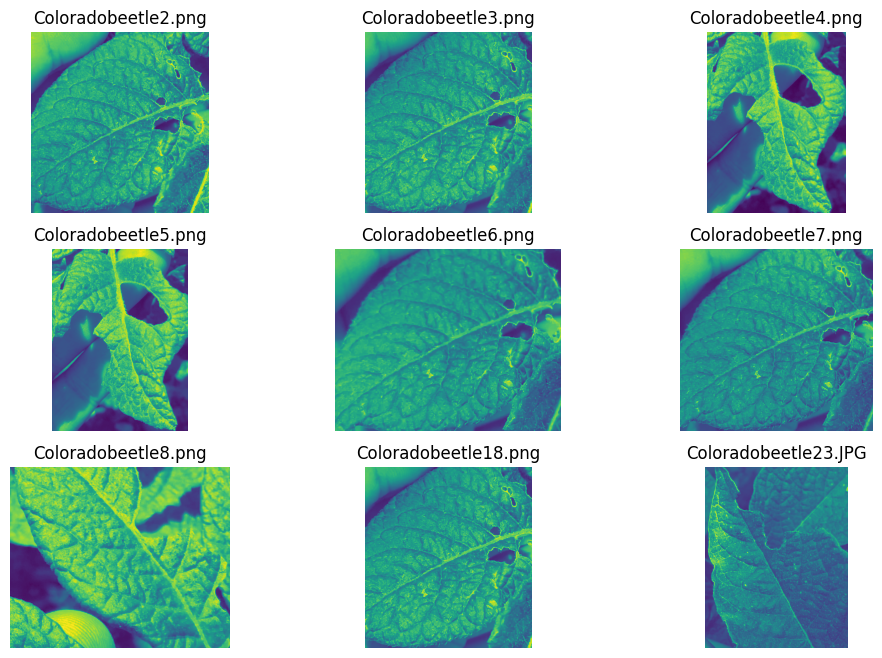

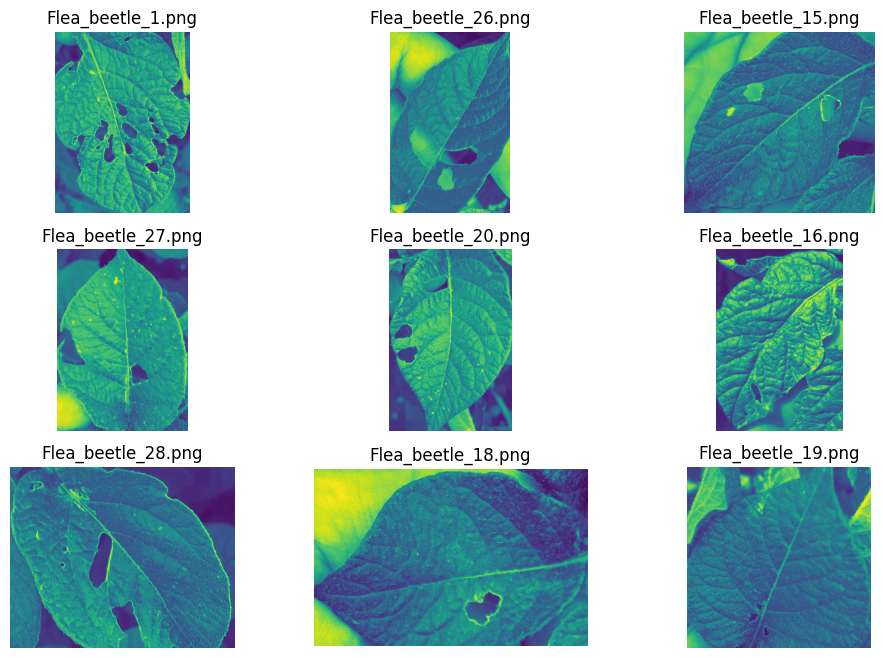

In [125]:
import joblib

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')
print(model.classes_)

# Define a function to predict the class of an image using the loaded model
def predict_class(img_path):
    # Load the image and preprocess it
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (400, 400))
    img = img.reshape(1, -1) / 255

    # Make the prediction
    pred = model.predict(img)

    # Return the predicted class label
    return pred[0]

# Define the number of images to display in the plots
num_images = 9

# Plot the test images for Colorado class
plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir(colorado_path)[:num_images]:
    plt.subplot(3, 3, c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/'+i,0)
    #p=sv.predict(img2)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

# Plot the test images for Flea class
plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir(flea_path)[:num_images]:
    plt.subplot(3, 3, c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/'+i,0)
    #p=sv.predict(img1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

plt.show()


In [120]:

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')
print(model.classes_)

[0 1]


Unknown insect.


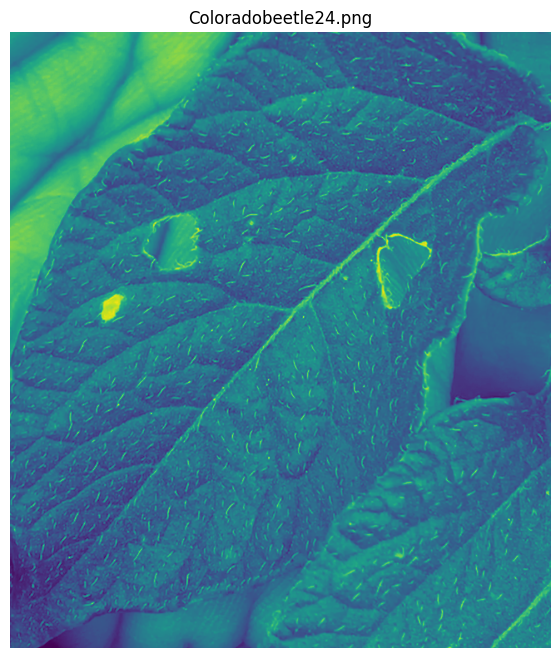

In [126]:
# Determine the solution based on the prediction
if pred == '0':
        print("Solutions for Fleas:")
        print("1. Keep your pets clean and groomed regularly, and treat them with flea medication as directed by your veterinarian.")
        print("2. Vacuum your home frequently, paying particular attention to areas where your pets spend most of their time.")
        print("3. Wash your pets' bedding and any other soft surfaces they come into contact with regularly.")
        print("4. Treat your yard and outdoor areas with flea repellent products.")
        print("5. Consider using flea traps or hiring a professional exterminator to help eliminate fleas from your home.")
elif pred == '1':
        print("Solutions for Colorado Potato Beetles:")
        print("1. Remove any infected potato plants and destroy them to prevent the spread of the disease.")
        print("2. Rotate your potato crops each year to prevent the buildup of pests and diseases in the soil.")
        print("3. Use insecticidal sprays or dusts specifically designed to control Colorado potato beetles, following the instructions carefully.")
        print("4. Encourage natural predators, such as ladybugs or lacewings, to help control the beetle population.")
        print("5. Consider using row covers to protect your plants from beetle infestations.")
else:
        print("Unknown insect.")

In [ ]:
dec={0:'colorado', 1:'flea'}

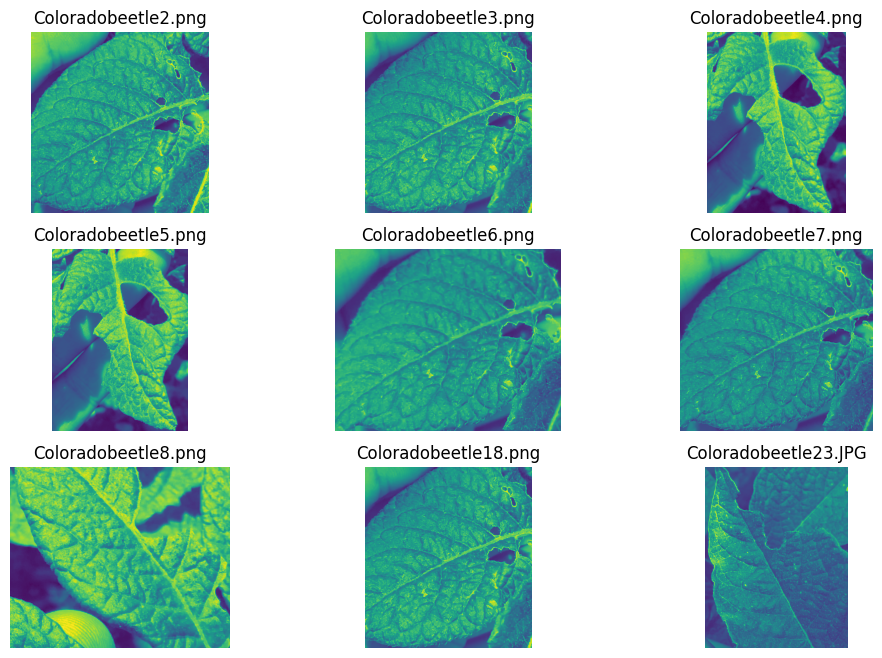

In [ ]:
#test
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/'+i,0)
    img1=cv2.resize(img,(400,400))
    img2=img1.reshape(1,-1)/255
    #p=sv.predict(img2)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

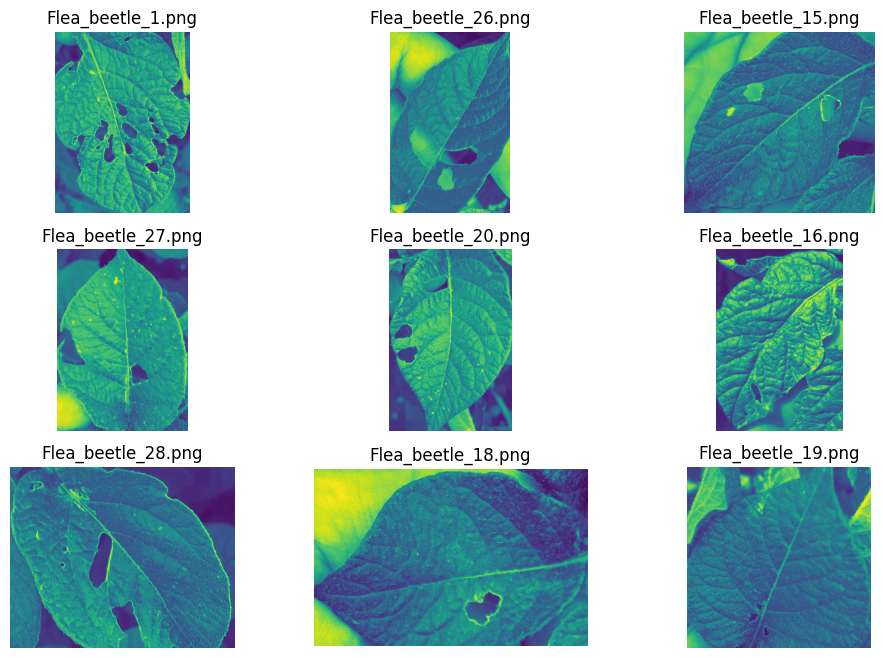

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/'+i,0)
    img1=cv2.resize(img,(400,400))
    img1=img1.reshape(1,-1)/255
    #p=sv.predict(img1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1